In [1]:
import sys
import scipy.io.wavfile as wav
from pydub import AudioSegment
import numpy as np
import matplotlib.pyplot as plt
import wave


path_to_audio = "data/Nokia Q1-2011qna.mp3"

#needed to give it the converter, maybe you dont
#AudioSegment.converter = "C:/Program Files/ffmpeg/bin/ffmpeg.exe"

# change rate of audio file to 16kHz
call = AudioSegment.from_file(path_to_audio)
call = call.set_frame_rate(16000)
#use 30 seconds
len_call = 60
segment = call[:len_call*1000]

# declare the new name of the audio file
path = 'talk.wav'

# export the audio file to wav format
segment.export(path, format="wav")




<_io.BufferedRandom name='talk.wav'>

/Users/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  
/Users/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead


Processing 1/60 s
Processing 2/60 s
Processing 3/60 s
Processing 4/60 s
Processing 5/60 s
Processing 6/60 s
Processing 7/60 s
Processing 8/60 s
Processing 9/60 s
Processing 10/60 s
Processing 11/60 s
Processing 12/60 s
Processing 13/60 s
Processing 14/60 s
Processing 15/60 s
Processing 16/60 s
Processing 17/60 s
Processing 18/60 s
Processing 19/60 s
Processing 20/60 s
Processing 21/60 s
Processing 22/60 s
Processing 23/60 s
Processing 24/60 s
Processing 25/60 s
Processing 26/60 s
Processing 27/60 s
Processing 28/60 s
Processing 29/60 s
Processing 30/60 s
Processing 31/60 s
Processing 32/60 s
Processing 33/60 s
Processing 34/60 s
Processing 35/60 s
Processing 36/60 s
Processing 37/60 s
Processing 38/60 s
Processing 39/60 s


Processing 40/60 s
Processing 41/60 s
Processing 42/60 s
Processing 43/60 s
Processing 44/60 s
Processing 45/60 s
Processing 46/60 s
Processing 47/60 s
Processing 48/60 s
Processing 49/60 s
Processing 50/60 s
Processing 51/60 s
Processing 52/60 s
Processing 53/60 s
Processing 54/60 s
Processing 55/60 s
Processing 56/60 s
Processing 57/60 s
Processing 58/60 s
Processing 59/60 s


/Users/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:44: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead


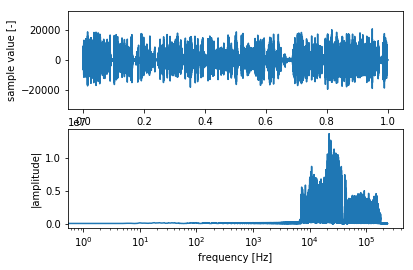

In [7]:
#BAND PASS FILTER (CUT LOW AND HIGH NOISE)

wr = wave.open(path, 'r')
par = list(wr.getparams()) # Get the parameters from the input.
par[3] = 0 # The number of samples will be set by writeframes.
da = np.fromstring(wr.readframes(sz), dtype=np.int16)
left, right = da[0::2], da[1::2] # left and right channel
lf, rf = np.fft.rfft(left), np.fft.rfft(right)

# Open the output file
ww = wave.open('filtered-talk.wav', 'w')
ww.setparams(tuple(par)) # Use the same parameters as the input file.

#PLAY WITH THIS SO REMOVE OUTER FREQUENCIES to the left and right of the lower plot
lowpass = 120 # Remove lower frequencies.
highpass = 3000 # Remove higher frequencies.

sz = wr.getframerate() # Read and process 1 second at a time.
c = int(wr.getnframes()/sz) # whole file

for num in range(c-1):
    print('Processing {}/{} s'.format(num+1, c))
    da = np.fromstring(wr.readframes(sz), dtype=np.int16)
    left, right = da[0::2], da[1::2] # left and right channel
    lf, rf = np.fft.rfft(left), np.fft.rfft(right)
    
    lf[:lowpass], rf[:lowpass] = 0, 0 # low pass filter
    lf[highpass:], rf[highpass:] = 0,0 # high pass filter
    #cutoff individual peaks (no feasible as they change in different recordings)
    lf[420:450], rf[420:450] = 0, 0 # line noise
    lf[620:700], rf[620:700] = 0, 0 # line noise
    lf[750:800], rf[750:800] = 0, 0 # line noise
    
    nl, nr = np.fft.irfft(lf), np.fft.irfft(rf)
    ns = np.column_stack((nl,nr)).ravel().astype(np.int16)
    ww.writeframes(ns.tostring())
# Close the files.
wr.close()
ww.close()

#build the plot
ww = wave.open('filtered-talk.wav', 'r')
sz = 44100*len_call # Read and process 1 second at a time.
da = np.fromstring(ww.readframes(sz), dtype=np.int16)
left, right = da[0::2], da[1::2]
lf, rf = np.fft.rfft(left), np.fft.rfft(right)

plt.figure(1)
a = plt.subplot(211)
r = 2**16/2
a.set_ylim([-r, r])
a.set_xlabel('time [s]')
a.set_ylabel('sample value [-]')
x = np.arange(len(left))/len(left)
plt.plot(x, left)
b = plt.subplot(212)
b.set_xscale('log')
b.set_xlabel('frequency [Hz]')
b.set_ylabel('|amplitude|')
plt.plot(abs(lf))
plt.show()
#plt.savefig('filtered.png',dpi=500)

wr.close()
ww.close()



/Users/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  
/Users/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:31: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead



Working with threshold: 
543937.4793904596

Processing 1/60 s
Processing 2/60 s
Processing 3/60 s
Processing 4/60 s
Processing 5/60 s
Processing 6/60 s
Processing 7/60 s
Processing 8/60 s
Processing 9/60 s
Processing 10/60 s
Processing 11/60 s
Processing 12/60 s
Processing 13/60 s
Processing 14/60 s
Processing 15/60 s
Processing 16/60 s
Processing 17/60 s
Processing 18/60 s
Processing 19/60 s
Processing 20/60 s
Processing 21/60 s
Processing 22/60 s
Processing 23/60 s
Processing 24/60 s
Processing 25/60 s
Processing 26/60 s
Processing 27/60 s
Processing 28/60 s
Processing 29/60 s
Processing 30/60 s
Processing 31/60 s
Processing 32/60 s
Processing 33/60 s
Processing 34/60 s
Processing 35/60 s
Processing 36/60 s
Processing 37/60 s
Processing 38/60 s
Processing 39/60 s
Processing 40/60 s
Processing 41/60 s
Processing 42/60 s
Processing 43/60 s
Processing 44/60 s
Processing 45/60 s
Processing 46/60 s
Processing 47/60 s
Processing 48/60 s
Processing 49/60 s
Processing 50/60 s
Processing 51/

/Users/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:57: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead


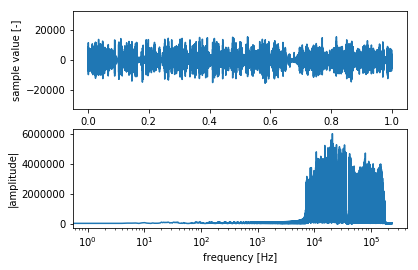

In [19]:
#BAND PASS WITH PEAK FILTERING (CAREFUL OF THOLD)

wr = wave.open(path, 'r')
par = list(wr.getparams()) # Get the parameters from the input.
par[3] = 0 # The number of samples will be set by writeframes.
da = np.fromstring(wr.readframes(sz), dtype=np.int16)
left, right = da[0::2], da[1::2] # left and right channel
lf, rf = np.fft.rfft(left), np.fft.rfft(right)

# Open the output file
ww = wave.open('filtered-talk.wav', 'w')
ww.setparams(tuple(par)) # Use the same parameters as the input file.

#PLAY WITH THIS SO REMOVE OUTER FREQUENCIES to the left and right of the lower plot
lowpass = 120 # Remove lower frequencies.
highpass = 3000 # Remove higher frequencies.

sz = wr.getframerate() # Read and process 1 second at a time.
c = int(wr.getnframes()/sz) # whole file

#WORKS BESTO ON SHORT RECORDINGS, CAREFUL WITH THOLD
#take top n peaks and use their mean as threshold
peaks = 10
thold = (abs(np.array(sorted(list(lf))[:peaks]).mean()))

print ("\nWorking with threshold: ")
print (str(thold)+ "\n")

for num in range(c-1):
    print('Processing {}/{} s'.format(num+1, c))
    da = np.fromstring(wr.readframes(sz), dtype=np.int16)
    left, right = da[0::2], da[1::2] # left and right channel
    lf, rf = np.fft.rfft(left), np.fft.rfft(right)
    
    #cutoff peacks bigger than thold
    for i in range(len(lf)):
        if abs(lf[i]) > thold:
            lf[i],rf[i] = 0, 0
    
    lf[:lowpass], rf[:lowpass] = 0, 0 # low pass filter
    lf[highpass:], rf[highpass:] = 0,0 # high pass filter
    #cutoff individual peaks (no feasible as they change in different recordings)
    lf[420:450], rf[420:450] = 0, 0 # line noise
    lf[620:700], rf[620:700] = 0, 0 # line noise
    lf[750:800], rf[750:800] = 0, 0 # line noise
    
    nl, nr = np.fft.irfft(lf), np.fft.irfft(rf)
    ns = np.column_stack((nl,nr)).ravel().astype(np.int16)
    ww.writeframes(ns.tostring())
# Close the files.
wr.close()
ww.close()

#build the plot
ww = wave.open('filtered-talk.wav', 'r')
sz = 44100*len_call # Read and process 1 second at a time.
da = np.fromstring(ww.readframes(sz), dtype=np.int16)
left, right = da[0::2], da[1::2]
lf, rf = np.fft.rfft(left), np.fft.rfft(right)

plt.figure(1)
a = plt.subplot(211)
r = 2**16/2
a.set_ylim([-r, r])
a.set_xlabel('time [s]')
a.set_ylabel('sample value [-]')
x = np.arange(len(left))/len(left)
plt.plot(x, left)
b = plt.subplot(212)
b.set_xscale('log')
b.set_xlabel('frequency [Hz]')
b.set_ylabel('|amplitude|')
plt.plot(abs(lf))
plt.show()
#plt.savefig('filtered.png',dpi=500)

wr.close()
ww.close()

